## CC Görüntüleri İçin Orta Nokta Bulma

Bu kod sadece CC görüntülerini hedef almıştır.

Bu işlemdeki yaklaşımımız,

* Segmentasyon modelinden çıkan meme ucu maskesinin orta noktasını tespit etme
* Segmentasyondan sonra memenin çıkan en büyük kontörünü aldığımızdaki en uç noktayı bulmak

İki işlem de kadranı belirleme için yapılmıştır. Amaç memenin orta başlangıç noktasından meme ucuna çizilen çizginin bizim için bir kadran ayırıcı görevi görmesidir.

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob

masks=glob.glob('')
mask = cv2.imread('/home/uraninjo/Desktop/Çalışmalar/Mergen1-Teknofest/Murat/KadranÖzel/Results/822670817/LCC_meme_mask.png', 0)
img=cv2.imread('/home/uraninjo/Desktop/Çalışmalar/Mergen1-Teknofest/Murat/KadranÖzel/Results/822670817/LCC.png')

# Maske üzerindeki 1'lerin konumlarını bul
y, x = np.where(mask == 255)

# Ortalama x ve y konumlarını hesapla
x_mean = int(np.mean(x))
y_mean = int(np.mean(y))

# Belirtilen bölümü kes
top = img[:y_mean, x_mean:]
bottom = img[y_mean:, x_mean:]

mock_img = img.copy()
cv2.line(mock_img, (0, y_mean), (img.shape[1]-1, y_mean), (255,0,0),  thickness=5)


# İki bölümü de görselleştir
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10,5))
ax1.imshow(top, cmap='gray')
ax1.set_title('Üst kısım')
ax2.imshow(bottom, cmap='gray')
ax2.set_title('Alt kısım')
ax3.imshow(img, cmap='gray')
ax4.imshow(mock_img, cmap='gray')

plt.show()


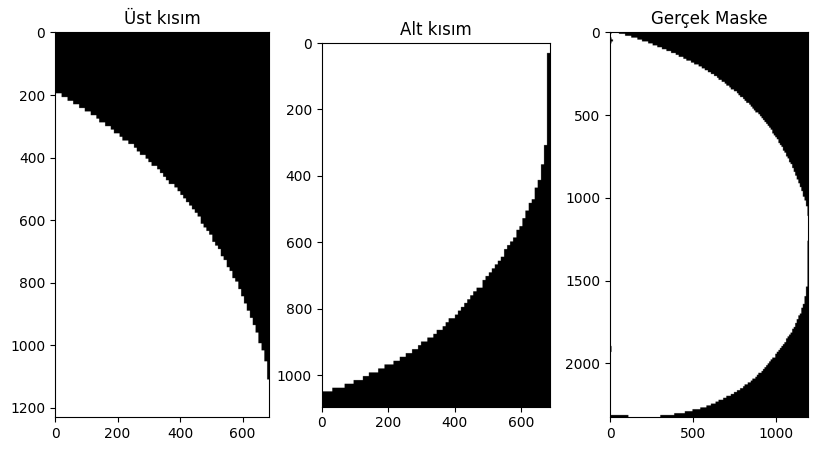

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob

masks=glob.glob('')
mask = cv2.imread('/home/uraninjo/Desktop/Çalışmalar/Mergen1-Teknofest/Murat/KadranÖzel/Results/822670817/LCC_meme_mask.png', 0)
img=cv2.imread('/home/uraninjo/Desktop/Çalışmalar/Mergen1-Teknofest/Murat/KadranÖzel/Results/822670817/LCC.png')

# Maske üzerindeki 1'lerin konumlarını bul
y, x = np.where(mask == 255)

# Ortalama x ve y konumlarını hesapla
x_mean = int(np.mean(x))
y_mean = int(np.mean(y))

# Belirtilen bölümü kes
top = mask[:y_mean, x_mean:]
bottom = mask[y_mean:, x_mean:]

mock_img = mask.copy()
cv2.line(mock_img, (0, y_mean), (img.shape[1]-1, y_mean), (255,0,0),  thickness=5)


# İki bölümü de görselleştir
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,5))
ax1.imshow(top, cmap='gray')
ax1.set_title('Üst kısım')
ax2.imshow(bottom, cmap='gray')
ax2.set_title('Alt kısım')

ax3.imshow(mock_img, cmap='gray')
ax3.set_title('Gerçek Maske')


plt.show()


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob

imgs=sorted(glob.glob('/home/uraninjo/Desktop/Çalışmalar/Mergen1-Teknofest/Murat/KadranÖzel/Denemeler/*_imgCC.png'))
masks=sorted(glob.glob('/home/uraninjo/Desktop/Çalışmalar/Mergen1-Teknofest/Murat/KadranÖzel/Denemeler/*combined_maskCC.png'))
for i in range(len(imgs)):
    try:
        print(imgs[i])
        print(masks[i])
        mask = cv2.imread(masks[i], 0)
        img=cv2.imread(imgs[i])

        # Maske üzerindeki 1'lerin konumlarını bul
        y, x = np.where(mask == 255)

        # Ortalama x ve y konumlarını hesapla
        x_mean = int(np.mean(x))
        y_mean = int(np.mean(y))

        # Belirtilen bölümü kes
        top = img[:y_mean, x_mean:]
        bottom = img[y_mean:, x_mean:]

        mock_img = img.copy()
        cv2.line(mock_img, (0, y_mean), (img.shape[1]-1, y_mean), (255,0,0),  thickness=5)


        # İki bölümü de görselleştir
        fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(10,5))
        ax1.imshow(top, cmap='gray')
        ax1.set_title('Üst kısım')
        ax2.imshow(bottom, cmap='gray')
        ax2.set_title('Alt kısım')
        ax3.imshow(img, cmap='gray')
        ax4.imshow(mock_img, cmap='gray')

        plt.show()
    except:
        print("Hata")
        print(imgs[i])


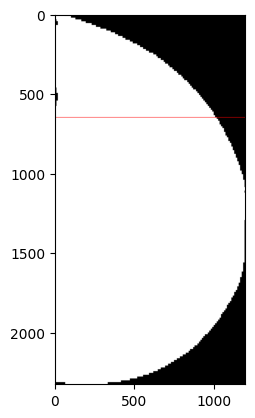

In [22]:
import cv2
from matplotlib import pyplot as plt

# Resmi aç
img = cv2.imread('combined_maskCC.png')

# Orta noktayı belirle (önceki soruda bulunan kod)
width, height = img.shape[1], img.shape[0]
white_pixels = 0
for x in range(50):
    for y in range(height):
        if (img[y, x] == [255,255,255]).all():
            white_pixels += 1
white_ratio = white_pixels / (50 * height)
middle = width // 2
if white_ratio > 0.5:
    middle += 50

# Çizgi çiz
cv2.line(img, (0, middle), (width, middle), (0, 0, 255), 2)

# Resmi göster
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob

masks=glob.glob('')
mask = cv2.imread('combined_maskCC.png', 0)
img=cv2.imread('combined_imgCC.png')

# Maske üzerindeki 1'lerin konumlarını bul
y, x = np.where(mask == 255)

# Ortalama x ve y konumlarını hesapla
x_mean = int(np.mean(x))
y_mean = int(np.mean(y))

# Belirtilen bölümü kes
top = img[:y_mean, x_mean:]
bottom = img[y_mean:, x_mean:]

mock_img = img
cv2.line(mock_img, (0, y_mean), (img.shape[1]-1, y_mean), (255,0,0),  thickness=5)


# Resmi aç
mask = cv2.imread('combined_maskCC.png')

# Orta noktayı belirle (önceki soruda bulunan kod)
width, height = mask.shape[1], mask.shape[0]
white_pixels = 0
for x in range(50):
    for y in range(height):
        if (mask[y, x] == [255,255,255]).all():
            white_pixels += 1
white_ratio = white_pixels / (50 * height)
middle = width // 2
if white_ratio > 0.5:
    middle += 50

# Çizgi çiz
mock_img2=img.copy()
cv2.line(mock_img2, (0, middle), (width, middle), (0, 0, 255), 5)

cv2.line(mask, (0, middle), (width, middle), (0, 255, 0), 5)


img2=img.copy()
cv2.line(img2, (0, (y_mean+middle)//2), ((img.shape[1]-1+width)//2, (y_mean+middle)//2), (255,0,0),  thickness=5)

# İki bölümü de görselleştir
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20,5))
ax1.imshow(top, cmap='gray')
ax1.set_title('Üst kısım')
ax2.imshow(bottom, cmap='gray')
ax2.set_title('Alt kısım')
ax3.imshow(img, cmap='gray')
ax4.imshow(mask, cmap='gray')
ax5.imshow(mock_img2, cmap='gray')
plt.show()
